<a href="https://colab.research.google.com/github/sfatimazahra/ML-Image-Classification-using-CIFAR-100/blob/main/EfficientNetB0_(Scratch)%20Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report

from keras.optimizers import Adam
from keras.models import Sequential
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout, Flatten

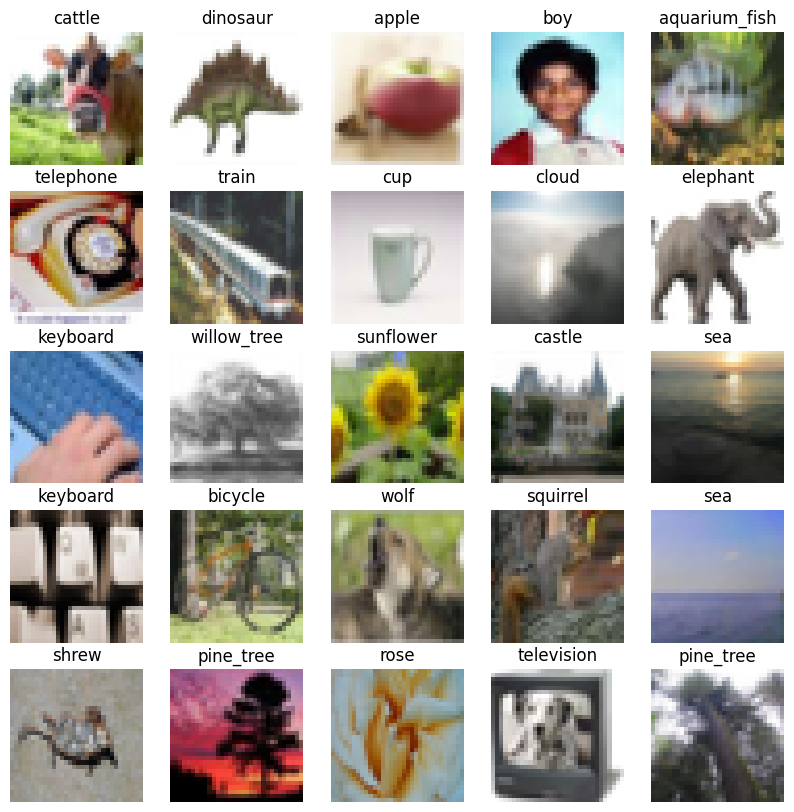

(50000, 32, 32, 3)


In [ ]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Map class indices to class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()
print(x_train.shape)

In [ ]:
# Normalize the entire dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
y_val = to_categorical(y_val, 100)

In [ ]:
base_model = EfficientNetB0(weights= None, include_top=False, input_shape=(32, 32, 3))

base_model.trainable = True

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer= Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6) #Reduces learning rate when no improvment in validation loss
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True) #Stops when we see no improvement

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1, 1, 1280)        4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 4756743 (18.15 MB)
Trainable params: 4714720 (17.99 MB)
Non-trainable params: 42023 (164.16 KB)
____________

Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(x_train)

In [ ]:
epochs = 50
batch_size = 128

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_scheduler, early_stopping]
                    )

test_loss, test_accuracy = model.evaluate(x_test, y_test)

Epoch 1/50
390/390 [==============================] - 93s 126ms/step - loss: 4.4344 - accuracy: 0.0326 - val_loss: 4.8074 - val_accuracy: 0.0096 - lr: 0.0010
Epoch 2/50
390/390 [==============================] - 43s 110ms/step - loss: 4.0398 - accuracy: 0.0717 - val_loss: 4.1786 - val_accuracy: 0.0650 - lr: 0.0010
Epoch 3/50
390/390 [==============================] - 44s 113ms/step - loss: 3.8933 - accuracy: 0.0904 - val_loss: 3.6776 - val_accuracy: 0.1142 - lr: 0.0010
Epoch 4/50
390/390 [==============================] - 43s 109ms/step - loss: 3.7433 - accuracy: 0.1123 - val_loss: 3.5973 - val_accuracy: 0.1398 - lr: 0.0010
Epoch 5/50
390/390 [==============================] - 44s 112ms/step - loss: 3.6650 - accuracy: 0.1272 - val_loss: 3.7634 - val_accuracy: 0.1246 - lr: 0.0010
Epoch 6/50
390/390 [==============================] - 44s 113ms/step - loss: 3.6248 - accuracy: 0.1334 - val_loss: 3.6780 - val_accuracy: 0.1348 - lr: 0.0010
Epoch 7/50
390/390 [==============================] 

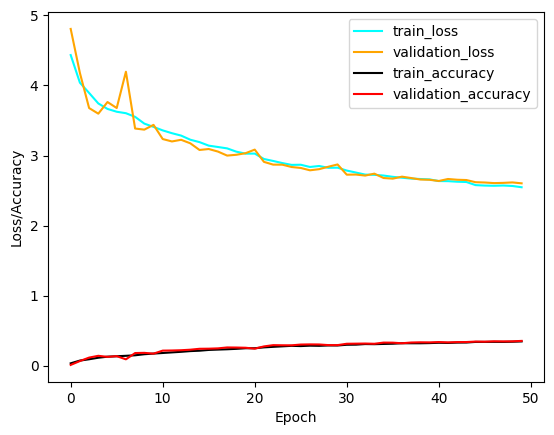

Test Accuracy: 0.328000009059906
Test Loss: 2.6539366245269775


In [ ]:
plt.plot(history.history['loss'], label='train_loss', color = 'Cyan')
plt.plot(history.history['val_loss'], label='validation_loss', color = 'Orange')
plt.plot(history.history['accuracy'], label='train_accuracy', color = 'black')
plt.plot(history.history['val_accuracy'], label='validation_accuracy', color = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

# model_save_path = 'E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Skintone_Recognition_3.h5'
# model_save_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\skintone_recog1.h5'
# model.save(model_save_path)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

TRANSFER LEARNING

In [ ]:
base_model = EfficientNetB0(weights= 'imagenet', include_top=False, input_shape=(32, 32, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer= Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6) #Reduces learning rate when no improvment in validation loss
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True) #Stops when we see no improvement

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1, 1, 1280)        4049571   
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               51300     
                                                                 
Total params: 4756743 (18.15 MB)
Trainable params: 707172 (2.70 MB)
Non-trainable params: 4049571 (15.45 MB)
___________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(x_train)

In [ ]:
epochs = 100
batch_size = 128

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_scheduler, early_stopping]
                    )

test_loss, test_accuracy = model.evaluate(x_test, y_test)

Epoch 1/100


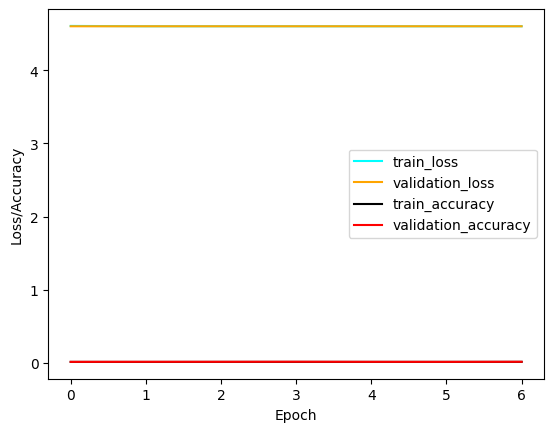

Test Accuracy: 0.009999999776482582
Test Loss: 4.605199337005615


In [ ]:
plt.plot(history.history['loss'], label='train_loss', color = 'Cyan')
plt.plot(history.history['val_loss'], label='validation_loss', color = 'Orange')
plt.plot(history.history['accuracy'], label='train_accuracy', color = 'black')
plt.plot(history.history['val_accuracy'], label='validation_accuracy', color = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.show()

# model_save_path = 'E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Skintone_Recognition_3.h5'
# model_save_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\skintone_recog1.h5'
# model.save(model_save_path)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")